# Random Forest


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from datetime import datetime


### Train table
I need to have a table to train the data, this is the export from BQ

In [16]:
df = pd.read_csv('./train_tables/mq_train_table_3.csv')
df.head()

,conversion_flag,user_pseudo_id,device_category,operating_system,platform,city,browser,traffic_source,device_brand,cnt_file_download,cnt_link_click,cnt_page_view,cnt_select_content,cnt_button_click,cnt_click,cnt_dropdown_click,cnt_view_search_results,cnt_login,cnt_navigation
0,0,q/Tgpq7PV0NPqGhS1mx07oeujBB/Nnf3/Y5uZFrWApM=.1...,desktop,Linux,WEB,Sydney,Chrome,organic,Google,0,38,72,0,3,35,0,1,0,0
1,0,Iikc9T/S7jaIc43TrYCUhPgBvgJMFNZeFVDjyXni9TU=.1...,mobile,Android,WEB,Sydney,Chrome,organic,Asus,2,43,123,0,30,20,6,0,0,0
2,1,8gu+hDT2lS63x7/i+2GDfaFlr3DHPW1l7BwbLGM3kx4=.1...,mobile,Android,WEB,Sydney,Chrome,organic,Google,0,20,39,0,16,16,1,0,0,0
3,0,JQtXZSbcWHB07cL46jZ5sgSEgWg3N2FG/qoWJB54er0=.1...,mobile,Android,WEB,Sydney,Chrome,(none),Google,0,15,28,0,5,14,0,0,0,0
4,0,kAFGBb+AIXnjpR8DJOuEZAzXVv15vTDQ7ALVUCEM9Jw=.1...,desktop,Macintosh,WEB,Sydney,Safari,(none),Apple,0,14,26,0,8,9,2,2,0,0


## Feature engineering
I need to fix the encoding on non numerical categories, and convert them to a binary, I used one-hot encoding to convert to true or false, and expand columns based on dimension value


In [18]:

X = df.drop(['conversion_flag','user_pseudo_id'], axis=1)
Y = df['conversion_flag']

categorical_features = ['device_category', 'operating_system', 'platform', 'city', 'browser', 'traffic_source', 'device_brand']
X_encoded = pd.get_dummies(X, columns=categorical_features)







## Model 

I used Random forest classifier as we are trying to predict a binary classification of yes or no

In [21]:
rf = RandomForestClassifier(n_estimators=10000, random_state=42)

## Test and learn

This frame work allows splitting the data and saving a bit of data for testing purposes

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

In [23]:
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10000, random_state=42)

## Evaluation

here we need to test for precision, recall, and accuracy. Overally mae and mse are non relevant for a classification model.

In [24]:
y_pred = rf.predict(X_test)

    
# Calculate metrics
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
    
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")



Precision: 0.5263157894736842
Recall: 0.03676470588235294
F1 Score: 0.06872852233676977
Accuracy: 0.898311444652908


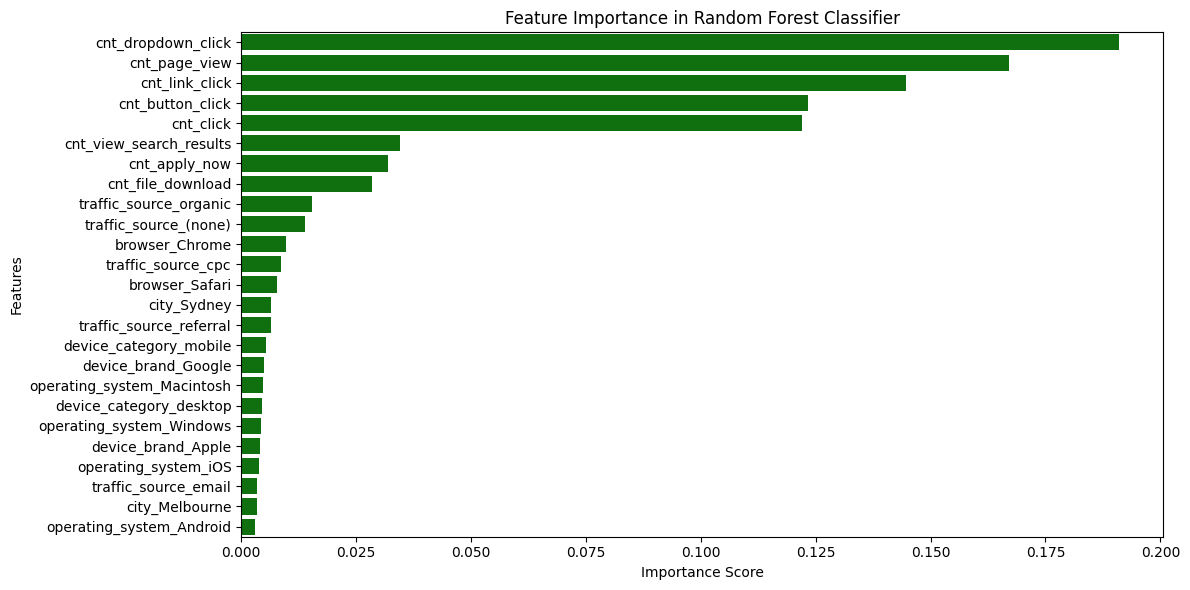


Feature Importance Scores:
                   feature  importance
        cnt_dropdown_click    0.191059
             cnt_page_view    0.167022
            cnt_link_click    0.144547
          cnt_button_click    0.123396
                 cnt_click    0.122024
   cnt_view_search_results    0.034432
             cnt_apply_now    0.031898
         cnt_file_download    0.028522
    traffic_source_organic    0.015312
     traffic_source_(none)    0.013894
            browser_Chrome    0.009718
        traffic_source_cpc    0.008546
            browser_Safari    0.007671
               city_Sydney    0.006485
   traffic_source_referral    0.006427
    device_category_mobile    0.005300
       device_brand_Google    0.004927
operating_system_Macintosh    0.004728
   device_category_desktop    0.004599
  operating_system_Windows    0.004368
        device_brand_Apple    0.004132
      operating_system_iOS    0.003924
      traffic_source_email    0.003446
            city_Melbourne    0.0034

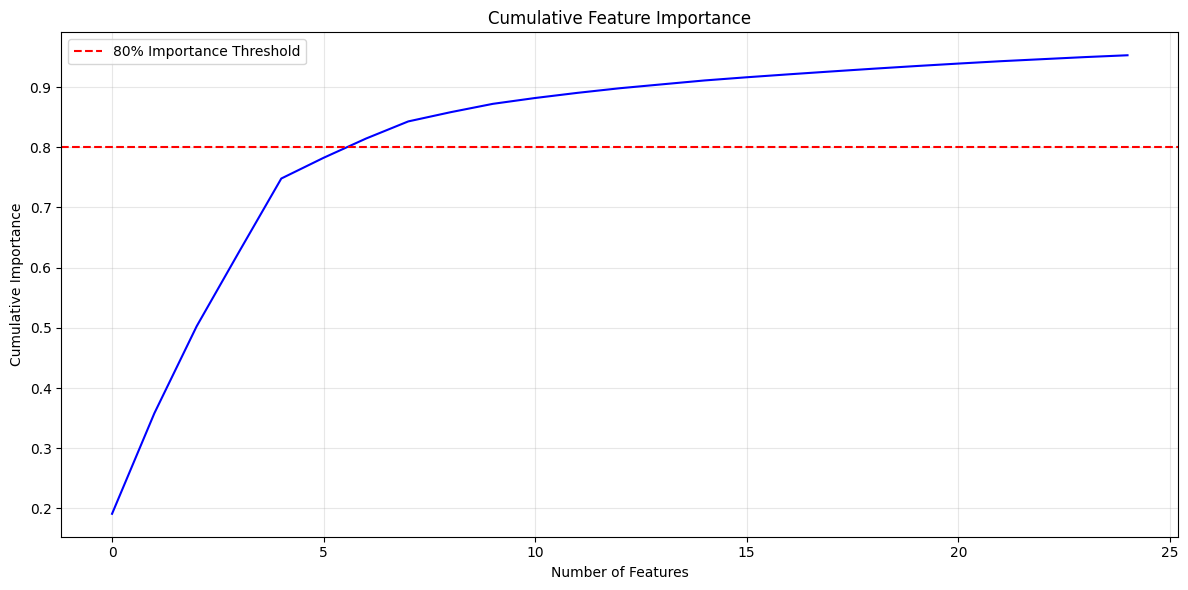


Number of features needed for 80% importance: 6

Top features needed for 80% importance:
                feature  importance
     cnt_dropdown_click    0.191059
          cnt_page_view    0.167022
         cnt_link_click    0.144547
       cnt_button_click    0.123396
              cnt_click    0.122024
cnt_view_search_results    0.034432


In [15]:
#feature engineering feature importance

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

# Sort features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances = feature_importances[feature_importances['importance']> 0.003]

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances, x='importance', y='feature', color = 'green')
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



# Display the feature importance scores
print("\nFeature Importance Scores:")
print(feature_importances.to_string(index=False))

feature_importances.to_csv('./output/feature_importances.csv', index=False)

# Calculate cumulative importance
feature_importances['cumulative_importance'] = feature_importances['importance'].cumsum()

# Plot cumulative importance
plt.figure(figsize=(12, 6))
plt.plot(range(len(feature_importances)), feature_importances['cumulative_importance'], 'b-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Importance Threshold')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find number of features needed for 80% importance
n_features_80 = len(feature_importances[feature_importances['cumulative_importance'] <= 0.8])
print(f"\nNumber of features needed for 80% importance: {n_features_80}")
print("\nTop features needed for 80% importance:")
print(feature_importances.head(n_features_80)[['feature', 'importance']].to_string(index=False))

## Load up prediciton Table


In [118]:


pred_df = pd.read_csv('./predict_tables/predict_table_13052025.csv', dtype={'user_pseudo_id': str})
X_pred = pred_df.drop(['conversion_flag', 'user_pseudo_id'], axis=1)
categorical_features = ['device_category', 'operating_system', 'platform', 'city', 'browser', 'traffic_source', 'device_brand']
X_pred_encoded = pd.get_dummies(X_pred, columns=categorical_features)

train_columns = X_encoded.columns.tolist()  #this caused issues because some values didnt exist in my pred table so it meant we have to find the missing ones and set to 0
X_pred_encoded = X_pred_encoded.reindex(columns=train_columns, fill_value=0)

In [119]:
y_pred = rf.predict(X_pred_encoded)
probability_pred = rf.predict_proba(X_pred_encoded)[:, 1]

## Getting an Audience list


In [122]:
#adding back the user_pseudo_id so we can see the results

results = pd.DataFrame({
    'user_pseudo_id': pred_df['user_pseudo_id'],
    'predicted_value': probability_pred,
    'predicted_conversion': (probability_pred > 0.1).astype(int)
})


In [129]:
#count al conversions predicted conversions 
print(results['predicted_conversion'].value_counts())

predicted_conversion
0    33167
1     1656
Name: count, dtype: int64


In [127]:

bins = [0, 0.1, 0.85, 1.0] 
labels = ['LOW', 'MEDIUM', 'HIGH']

results['conversion_probability_group'] = pd.cut(results['predicted_value'], 
                                           bins=bins, 
                                           labels=labels, 
                                           include_lowest=True)


prob_group_counts = results['conversion_probability_group'].value_counts().sort_index()
results.to_csv(f'./output/scikit_rfc_prediction_results_grouped_{datetime.now().strftime("%d%m%Y")}.csv', index=False)
print(prob_group_counts)

conversion_probability_group
LOW       33167
MEDIUM     1454
HIGH        202
Name: count, dtype: int64


## Plotting results

In [110]:
#classify conversion_probabilty in groups [0% to 10%], [10% to 20%], [20% to 30%], [30% to 40%], [40% to 50%], [50% to 60%], [60% to 70%], [70% to 80%], [80% to 90%], [90% to 100%
# Create bins for conversion probability from 0% to 100% in 10% increments
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# Classify conversion probabilities into bins
results['probability_group'] = pd.cut(results['predicted_value'], bins=bins, labels=labels, include_lowest=True)

# Display the count of records in each bin
prob_group_counts = results['probability_group'].value_counts().sort_index()
print(prob_group_counts)



probability_group
0-10%      33283
10-20%       489
20-30%       278
30-40%       414
40-50%        69
50-60%        30
60-70%        14
70-80%        33
80-90%        24
90-100%      189
Name: count, dtype: int64


In [128]:

positive_results = results[results['predicted_value'] > 0]

positive_results.to_csv(f'./output/scikit_rfc_positive_results_{datetime.now().strftime("%d%m%Y")}.csv', index=False)





In [ ]:
# Create a scatter plot of just the conversion probability scores
plt.figure(figsize=(12, 6))

results = results.sort_values(by=['predicted_value'], ascending=False)
# Use index as x-axis to spread out the points
plt.scatter(range(len(results)), results['predicted_value'], alpha=0.7, color='blue')

# Add a horizontal line at common threshold values
plt.axhline(y=0.5, color='red', linestyle='--', label='0.35 threshold')
plt.axhline(y=0.85, color='green', linestyle='--', label='0.85 threshold')

# Add labels and title
plt.xlabel('Index (User Count)')
plt.ylabel('Conversion Probability')
plt.title('Scatter Plot of Conversion Probability Scores')

# Add legend and grid
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd


feature_names = X_pred_encoded.columns.tolist()
print(feature_names)

# Define class names (adjust if your target isn't 0 and 1)
# Only used if 'rf' is a classifier
class_names = ['Non-conversion', 'Conversion']

# Visualize the first 3 trees from the forest
num_trees_to_plot = 5
plt.figure(figsize=(100, 10 * num_trees_to_plot)) # Adjust size as needed

for i in range(min(num_trees_to_plot, len(rf.estimators_))):
    tree_to_plot = rf.estimators_[i]
    plt.subplot(num_trees_to_plot, 1, i + 1)

    plot_tree(tree_to_plot,
                feature_names=feature_names,
                # Use class_names only if it's a classifier model
                class_names=class_names if hasattr(rf, 'classes_') else None,
                filled=True,
                rounded=True,
                fontsize=7, # Adjust font size for readability
                max_depth=5, # Limit depth to keep the plot manageable
                precision=2) # Show values with 2 decimal places
    plt.title(f"Decision Tree {i+1}")

plt.tight_layout()
plt.savefig('decision_trees.png')
plt.show()



Here's the content converted to markdown:

---

### Nature of the Problem:
- **Random Forest Classifier**: Designed for classification tasks, making it ideal for predicting binary outcomes (0 or 1).
- **Linear Regression**: Designed for continuous outcomes, not binary classification.

### Handling Non-linearity:
- **Random Forest**: Captures complex, non-linear relationships between features and the target variable by combining multiple decision trees.
- **Linear Regression**: Assumes a linear relationship, which may not capture the true nature of the data.

### Robustness to Overfitting:
- **Random Forest**: Uses ensemble learning to reduce overfitting by averaging multiple trees.
- **Linear Regression**: More prone to overfitting, especially with many features or noise.

### Feature Importance:
- **Random Forest**: Provides insights into feature importance, helping identify which features contribute most to predictions.
- **Linear Regression**: Coefficients indicate feature impact, but less robust to multicollinearity.

### Performance Metrics:
- **Random Forest**: Directly optimizes for classification metrics like accuracy, precision, recall, and F1-score.
- **Linear Regression**: Optimizes for minimizing error in continuous predictions, not suitable for classification metrics.

---

